<a href="https://colab.research.google.com/github/Gui-mp8/MiniProjeto_Roof.Imoveis/blob/main/MiniProjetoDNC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import scipy.stats as stats

In [ ]:
#Importando os dados
df = pd.read_csv(r'/content/kc_house_data.csv')

In [ ]:
#Checando os dados
df.shape
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Renomeando as colunas
df.rename(columns = {'date':'DataVenda', 
                     'price':'PrecoVenda', 
                     'bedrooms':'Nquartos', 
                     'bathrooms':'Nbanheiros',
                     'floors':'Nandares', 
                     'waterfront':'Beira-mar', 
                     'view':'Grau da Vista', 
                     'condition':'Condicao', 
                     'grade':'QualidadeConstrucao', 
                     'sqft_above':'terreno', 
                     'sqft_basement':'porao', 
                     'yr_built':'AnoContrucao', 
                     'yr_renovated':'AnoRestauracao', 
                     'zipcode':'CEP'}, inplace = True)

#sqft_living = Tamanho da area habitavel em ft^2
#sqft_lot = Tamanho do terreno em ft^2
#sqft_living15 = Média da área habitavel dos 15 imoveis mais proximos em ft^2
#sqft_lot15 = Média da area do terreno dos 15 imoveis mais proximos em ft^2

df

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,sqft_living,sqft_lot,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,terreno,porao,AnoContrucao,AnoRestauracao,CEP,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#Checar os tipos de dados
df.dtypes

id                       int64
DataVenda               object
PrecoVenda             float64
Nquartos                 int64
Nbanheiros             float64
sqft_living              int64
sqft_lot                 int64
Nandares               float64
Beira-mar                int64
Grau da Vista            int64
Condicao                 int64
QualidadeConstrucao      int64
terreno                  int64
porao                    int64
AnoContrucao             int64
AnoRestauracao           int64
CEP                      int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
dtype: object

In [ ]:
#Transformar ft^2 em m^2
#m^2 = ft^2/10764
def mquadrado(x):
  return x/10.763

df['sqft_living'] = df['sqft_living'].apply(mquadrado)
df['sqft_lot'] = df['sqft_lot'].apply(mquadrado)
df['sqft_living15'] = df['sqft_living15'].apply(mquadrado)
df['sqft_lot15'] = df['sqft_lot15'].apply(mquadrado)
df

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,sqft_living,sqft_lot,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,terreno,porao,AnoContrucao,AnoRestauracao,CEP,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,109.634860,524.946576,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,124.500604,524.946576
1,6414100192,20141209T000000,538000.0,3,2.25,238.781009,672.860727,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,157.019418,709.746353
2,5631500400,20150225T000000,180000.0,2,1.00,71.541392,929.108984,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,252.717644,749.047663
3,2487200875,20141209T000000,604000.0,4,3.00,182.105361,464.554492,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,126.358822,464.554492
4,1954400510,20150218T000000,510000.0,3,2.00,156.090309,750.720059,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,167.239617,697.110471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,142.153675,105.082226,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,142.153675,140.202546
21609,6600060120,20150223T000000,400000.0,4,2.50,214.624175,540.091053,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,170.026944,668.958469
21610,1523300141,20140623T000000,402101.0,2,0.75,94.769116,125.429713,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,94.769116,186.472173
21611,291310100,20150116T000000,400000.0,3,2.50,148.657438,221.871225,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,131.004367,119.576326


In [ ]:
df.rename(columns = {'sqft_living':'AreaCasa', 'sqft_lot':'AreaTerreno', 'sqft_living15':'Media_AC15','sqft_lot15':'Media_AT15' }, inplace = True)
df.head()

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,AreaCasa,AreaTerreno,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,terreno,porao,AnoContrucao,AnoRestauracao,CEP,lat,long,Media_AC15,Media_AT15
0,7129300520,20141013T000000,221900.0,3,1.00,109.634860,524.946576,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,124.500604,524.946576
1,6414100192,20141209T000000,538000.0,3,2.25,238.781009,672.860727,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,157.019418,709.746353
2,5631500400,20150225T000000,180000.0,2,1.00,71.541392,929.108984,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,252.717644,749.047663
3,2487200875,20141209T000000,604000.0,4,3.00,182.105361,464.554492,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,126.358822,464.554492
4,1954400510,20150218T000000,510000.0,3,2.00,156.090309,750.720059,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,167.239617,697.110471


In [ ]:
#Checar se existe nulo
df.isna().sum()

id                     0
DataVenda              0
PrecoVenda             0
Nquartos               0
Nbanheiros             0
AreaCasa               0
AreaTerreno            0
Nandares               0
Beira-mar              0
Grau da Vista          0
Condicao               0
QualidadeConstrucao    0
terreno                0
porao                  0
AnoContrucao           0
AnoRestauracao         0
CEP                    0
lat                    0
long                   0
Media_AC15             0
Media_AT15             0
dtype: int64

In [ ]:
#Alinhando os dados de acordo com o maior preço
df.sort_values(['PrecoVenda'], ascending=False, inplace=True)
df.describe()


,id,PrecoVenda,Nquartos,Nbanheiros,AreaCasa,AreaTerreno,Nandares,Beira-mar,Grau da Vista,Condicao,QualidadeConstrucao,terreno,porao,AnoContrucao,AnoRestauracao,CEP,lat,long,Media_AC15,Media_AT15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,193.245353,1403.601929,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,184.572377,1186.328686
std,2.876566e+09,3.671272e+05,0.930062,0.770163,85.333169,3848.416939,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,63.680322,2536.855861
min,1.000102e+06,7.500000e+04,0.000000,0.000000,26.944161,48.313667,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,37.071448,60.484995
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,132.583852,468.270928,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,138.437239,473.845582
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,177.459816,707.795224,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,170.956053,707.981046
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,236.922791,993.031683,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,219.269720,936.820589
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1258.013565,153429.248351,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,576.976679,80943.974728


In [ ]:
#Checar se existe nulo
df.isna().sum()

id                     0
DataVenda              0
PrecoVenda             0
Nquartos               0
Nbanheiros             0
AreaCasa               0
AreaTerreno            0
Nandares               0
Beira-mar              0
Grau da Vista          0
Condicao               0
QualidadeConstrucao    0
terreno                0
porao                  0
AnoContrucao           0
AnoRestauracao         0
CEP                    0
lat                    0
long                   0
Media_AC15             0
Media_AT15             0
dtype: int64

In [ ]:
#Convertendo os dados da coluna 'Data da Venda' em data
#limpando os dados da coluna
df['DataVenda']= pd.to_datetime(df['DataVenda'])
df

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,AreaCasa,AreaTerreno,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,terreno,porao,AnoContrucao,AnoRestauracao,CEP,lat,long,Media_AC15,Media_AT15
7252,6762700020,2014-10-13,7700000.0,6,8.00,1119.576326,2564.340797,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,366.068940,817.615906
3914,9808700762,2014-06-11,7062500.0,5,4.50,932.825420,3467.899285,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,365.139831,2364.489455
9254,9208900037,2014-09-19,6885000.0,6,7.75,918.888786,2914.986528,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,421.815479,3970.082691
4411,2470100110,2014-08-04,5570000.0,5,5.75,854.780266,3258.292298,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,330.762798,2261.915823
1448,8907500070,2015-04-13,5350000.0,5,5.00,743.287188,2228.467899,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,427.390133,2020.812041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,2014-11-05,82000.0,3,1.00,79.903373,968.689027,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,105.918424,1045.247608
16198,3028200080,2015-03-24,81000.0,2,1.00,67.824956,926.786212,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,79.903373,836.198086
465,8658300340,2014-05-23,80000.0,1,0.75,39.951686,469.200037,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,111.493078,696.831738
15293,40000362,2014-05-06,78000.0,2,1.00,72.470501,1518.535724,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,157.948527,965.065502


In [ ]:
# análise de correlação
# Saber quais variáveis que mais impactam no valor da venda do imóvel
correlation = df.corr()

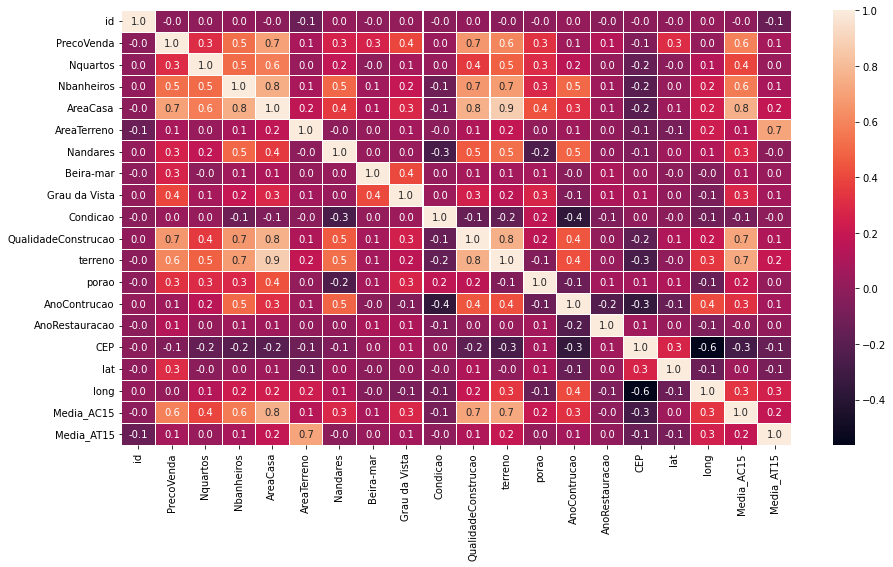

In [ ]:
# plot da matriz de correlação
plt.figure(figsize = (15,8))
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.10)
plot

In [ ]:
#Checar se existe nulo
df.isna().sum()

id                     0
DataVenda              0
PrecoVenda             0
Nquartos               0
Nbanheiros             0
AreaCasa               0
AreaTerreno            0
Nandares               0
Beira-mar              0
Grau da Vista          0
Condicao               0
QualidadeConstrucao    0
terreno                0
porao                  0
AnoContrucao           0
AnoRestauracao         0
CEP                    0
lat                    0
long                   0
Media_AC15             0
Media_AT15             0
dtype: int64

In [ ]:
# A partir da correlação descobrimos quais são os principais fatores que influenciam no preço que são: 
# Nbanheiros (0,5), AreaCasa(0,7), QualidadeConstrucao (0,7), Area acima do solo(0,6), Media_AC15(0,6) -> valordevenda
# Implementando Regressão Linear com Python
# importar os pacotes necessários
# Como é a estrutura estatística dos dados que mais correlacionam com o valor do imóvel?? 

varimportante = df[['id','PrecoVenda', 'Nbanheiros', 'AreaCasa', 'QualidadeConstrucao', 'terreno','Media_AC15']]
varimportante.describe().astype(int)


,id,PrecoVenda,Nbanheiros,AreaCasa,QualidadeConstrucao,terreno,Media_AC15
count,21613,21613,21613,21613,21613,21613,21613
mean,4580301520,540088,2,193,7,1788,184
std,2876565571,367127,0,85,1,828,63
min,1000102,75000,0,26,1,290,37
25%,2123049194,321950,1,132,7,1190,138
50%,3904930410,450000,2,177,7,1560,170
75%,7308900445,645000,2,236,8,2210,219
max,9900000190,7700000,8,1258,13,9410,576


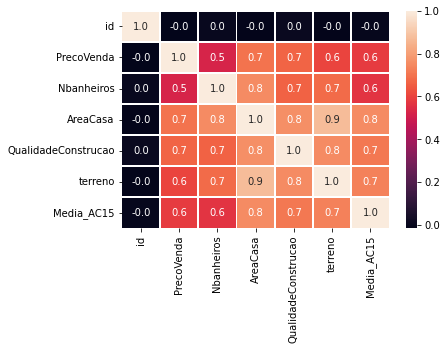

In [ ]:
#Dentre os dados que mais se correlacionam, quais mais se correlacionam entre si?
# análise de correlação
correlation2 = varimportante.corr()

# plot da matriz de correlação

plot2 = sn.heatmap(correlation2, annot = True, fmt=".1f", linewidths=.6)
plot2

In [ ]:
### ideia do que e como buscar 
## if Nbanheiros >= 2 and AreaCasa >= 190 and QualidadeConstrucao >= 7 and terreno >= 1780 and Media_AC15 > 180 and Precovenda < 540088:
  # print(id)
# else:
  # print("Não foi encontrado nenhum imóvel com essas características")

In [ ]:
## foram filtratdas as principais caracteristicas que influenciam no valor do imóvel
## esse filtro foi baseado no valor da média dessas características
## com objetivo de buscar imóveis com características iguais ou superiores a média e com valor de vendo menor para que a imobiliária possa lucar com a revenda

cincomelhores = df[(df['PrecoVenda'] > 367127) & (df['Nbanheiros']>=2) & (df['AreaCasa'] >= 200) & (df['QualidadeConstrucao'] >= 7) & (df['terreno'] >= 2000) & (df['Media_AC15'] > 180)]
cincomelhores.tail().sort_values(by=['PrecoVenda'],ascending=True)

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,AreaCasa,AreaTerreno,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,terreno,porao,AnoContrucao,AnoRestauracao,CEP,lat,long,Media_AC15,Media_AT15
6311,6600780130,2014-05-02,367500.0,4,3.00,288.952894,671.838707,2.0,0,0,...,8,3110,0,1997,0,98092,47.3279,-122.191,262.008734,679.271579
20354,255450020,2014-09-18,367899.0,3,2.50,224.844374,439.003995,2.0,0,0,...,8,2420,0,2014,0,98038,47.3710,-122.018,220.198829,390.225773
13888,7967900150,2015-04-30,367950.0,4,2.50,281.520022,882.653535,2.0,0,0,...,8,3030,0,1989,0,98001,47.3511,-122.287,246.213881,882.653535
11880,8731982050,2015-04-23,367999.0,4,2.75,318.684382,743.287188,1.5,0,0,...,8,3430,0,1972,0,98023,47.3183,-122.382,194.183778,743.287188
5213,9264960480,2014-12-08,368000.0,4,2.50,252.717644,682.895104,2.0,0,0,...,9,2720,0,1989,0,98023,47.3028,-122.350,238.781009,774.505249


In [ ]:
## 5 imóveis para não comprar

cincopiores = df[(df['PrecoVenda'] > 540088) & (df['Nbanheiros']<2) & (df['AreaCasa'] < 200) & (df['QualidadeConstrucao'] < 7) & (df['terreno'] < 2000) & (df['Media_AC15'] < 180)]
cincopiores.tail(6).sort_values(by=['PrecoVenda'],ascending=True)

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,AreaCasa,AreaTerreno,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,terreno,porao,AnoContrucao,AnoRestauracao,CEP,lat,long,Media_AC15,Media_AT15
9144,4048400191,2014-06-05,545000.0,3,1.75,157.948527,4798.754994,1.5,0,0,...,6,1700,0,1931,0,98059,47.4704,-122.076,102.201988,3670.352132
15776,5528600050,2015-02-11,546000.0,2,1.00,111.493078,1194.462510,1.0,0,0,...,6,1200,0,1948,0,98027,47.5321,-122.034,161.664963,566.570659
3433,8121100015,2015-05-05,550000.0,3,1.00,99.414661,344.978166,1.0,0,0,...,6,1070,0,1917,0,98118,47.5683,-122.285,119.855059,367.927158
17842,4151800265,2015-03-06,550000.0,3,1.00,93.840007,568.614699,1.0,0,0,...,6,1010,0,1942,0,98033,47.6648,-122.204,117.067732,555.328440
8057,2722059013,2015-02-04,550000.0,2,1.00,117.996841,4047.198736,1.0,0,0,...,5,1270,0,1908,0,98042,47.3651,-122.165,173.743380,646.659853
15284,3584800010,2015-04-08,550000.0,3,1.00,81.761591,619.158227,1.0,0,0,...,6,880,0,1961,0,98033,47.6855,-122.199,157.019418,609.867137
